## MLP for DDoS intrusion detection
### Using DDoS file

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # to disable GPU

import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Sequential

from keras import callbacks
from keras.callbacks import CSVLogger

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Read and prepare dataset

In [7]:
np.random.seed(667)  # randomize

testdata = pd.read_csv("./DAL_workshop_datasets/DDoS2007_spounged.csv", header=None)


#X = traindata.iloc[:,0:42]
#Y = traindata.iloc[:,0]
y_ini = testdata.iloc[:,0]
X_ini = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X_ini)
X_tras = scaler.transform(X_ini) #X Transformed

# reshape input to be [samples, time steps, features]
X = X_tras
y = np.array(y_ini)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

MLP Network Structure

In [8]:
NN = Sequential()
NN.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=41))
NN.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
NN.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
NN.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])


Training (FIT)

In [9]:
history = NN.fit(X_train,y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
70000/70000 [==============================] - 83s 1ms/step - loss: 0.4333 - accuracy: 0.7956 - val_loss: 0.3921 - val_accuracy: 0.8162
Epoch 2/10
70000/70000 [==============================] - 81s 1ms/step - loss: 0.3781 - accuracy: 0.8248 - val_loss: 0.3674 - val_accuracy: 0.8295
Epoch 3/10
70000/70000 [==============================] - 84s 1ms/step - loss: 0.3559 - accuracy: 0.8370 - val_loss: 0.3451 - val_accuracy: 0.8420
Epoch 4/10
70000/70000 [==============================] - 84s 1ms/step - loss: 0.3385 - accuracy: 0.8480 - val_loss: 0.3332 - val_accuracy: 0.8519
Epoch 5/10
70000/70000 [==============================] - 81s 1ms/step - loss: 0.3175 - accuracy: 0.8618 - val_loss: 0.3089 - val_accuracy: 0.8661
Epoch 6/10
70000/70000 [==============================] - 89s 1ms/step - loss: 0.3031 - accuracy: 0.8693 - val_loss: 0.2940 - val_accuracy: 0.8725
Epoch 7/10
70000/70000 [==============================] - 84s 1ms/step - loss: 0.2920 - accuracy: 0.8752 - val_loss: 0

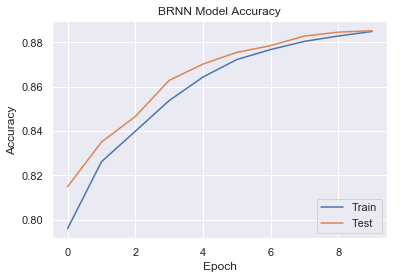

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()



Results

In [12]:
y_prob = NN.predict(X_test)
y_pred = (y_prob > 0.5).astype(np.int)
np.savetxt("cnn.txt", y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average="binary")
precision = precision_score(y_test, y_pred , average="binary")
f1 = f1_score(y_test, y_pred, average="binary")

print("confusion matrix")
print("----------------------------------------------")
print("accuracy %.4f" %accuracy)
print("recall %.4f" %recall)
print("precision %.4f" %precision)
print("f1score %.4f" %f1)
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix", cm)
print("----------------------------------------------")

confusion matrix
----------------------------------------------
accuracy 0.8852
recall 0.7877
precision 0.8710
f1score 0.8272
confusion matrix [[183095  12216]
 [ 22227  82463]]
----------------------------------------------


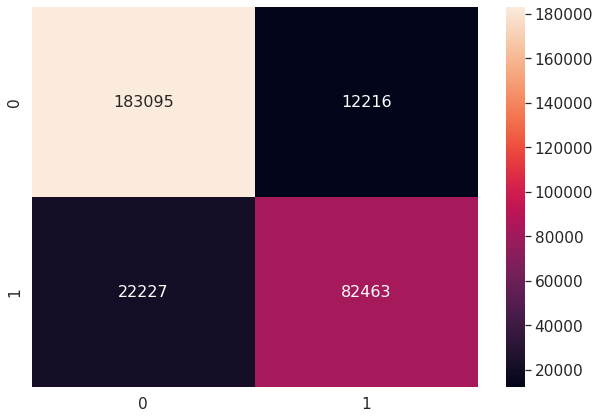

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

In [ ]:
#EOF